# 6장 결정 트리

## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
print(os.getcwd())

C:\Users\user\road_to_master\Hands on Machine Learning


In [21]:
!pip install pydot

In [42]:
from sklearn.tree import export_graphviz
import os, pydot
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

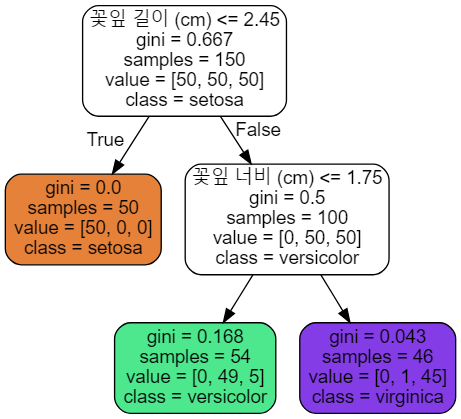

## 6.2 예측하기

트리가 어떻게 예측하는지 알아보자.  
먼저 __루트 노드__(맨꼭대기의 노드) 에서 이 노드는 꽃잎의 길이가 2.45cm보다 짧은지 검사한다. 만약 그렇다면 루트 노드에서 왼쪽의 __자식노드__로 이동하고 이경우가 __리프노드__이므로 추가적인 검사를 하지않는다. 그냥 노드에 있는 예측 클래스를 보고 결정 트리가새로 발견한 꽃의 품종을 Setosa로 예측한다.

또 다른 꽃을 발견햇는데 이번에는 2.45보다 길었다고 가정하자. 그러면 오른쪽 노드로 이동한다. 이 노드는 리프노드가 아니라서 추가로 '꽃잎의 너비가 1.75보다 작은지' 검사한다. 만약 그렇다면 이꽃은 아마도 Versicolor이고 아니라면 virginica로 분류한다.

`Tip`  
결정트리의 장점중 하나는 데이터 전처리가 거의 필요없다는 것이다. 특히 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.

노드의 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것.  

노드의 gini 속성은 __불순도__를 측정한것. 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 한다.  
예를들어 깊이 2의 왼쪽 노드의 gini 점수는 $1-(0/54)^2-(40/54)^2-(5/54)^2 = 0.168$ 이다. 

지니 불순도 => $G_i = 1 - \sum p_{i,k}^2$  
여기서 $p_{i,k}$는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율

`NOTE`  
사이킷런은 __이진트리__만 만드는 CART 알고리즘을 사용한다. 그러므로 리프 노드 이외의 모든 노드는 자식노드를 2개씩 가진다.  
하지만 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있다.

## 6.3 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다.  
먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환한다.  예를들어 길이가 5이고 너비가 1.5인 꽃잎을 발견했다고 가정하자. 이에 해당하는 리프 노드는 깊이 2의 왼쪽 노드이므로 결정 트리는 그에 해당하는 확률을 출력한다.  
즉 Setosa는 0% (0/54)